# Pathway Evaluation
The goal is to analyse the behaviour of the different pathway when they are fed with the chosen substrate Methanol. They are judged by their maximum production and the maximum MA flux in relation to the biomass growth rate.

### Loading model and defining medium
This is only loading the basis model and adding NAM, NA and NR to the medium, aswell as defining their maximum optake rates. It spits out a Table to visualize the media composition.

In [1]:
# Importing used packages and model
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd
import matplotlib.pyplot as plt

model = read_sbml_model('iML1515.xml')
%run -i create_pathway.ipynb
# flux unit is mmol / [gDW h]

#Defining media
model.add_boundary(model.metabolites.get_by_id("ncam_e"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("nr_e"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("na_e"), type="exchange")

#Choosing uptake rates
medium=model.medium
medium['EX_ncam_e'] = 100
medium['EX_nr_e'] = 100
medium["EX_na_e"] = 100
medium["EX_glc__D_e"] = 10
print('Table 2: Medium composition')
# create a data frame to plot a table
med_names = dict()
for flux in medium:
    meta = model.reactions.get_by_id(flux).metabolites
    for element in meta:
        med_names[flux] = element.name
df_med = pd.DataFrame(medium, index=['uptake'])
df_names = pd.DataFrame(med_names, index=['name'])
display(pd.concat([df_names,df_med]))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-20
Table 2: Medium composition


,EX_pi_e,EX_co2_e,EX_fe3_e,EX_h_e,EX_mn2_e,EX_fe2_e,EX_glc__D_e,EX_zn2_e,EX_mg2_e,EX_ca2_e,...,EX_nh4_e,EX_k_e,EX_na1_e,EX_cl_e,EX_o2_e,EX_tungs_e,EX_slnt_e,EX_ncam_e,EX_nr_e,EX_na_e
name,Phosphate,CO2 CO2,Iron (Fe3+),H+,Manganese,Fe2+ mitochondria,D-Glucose,Zinc,Magnesium,Calcium,...,Ammonium,Potassium,Sodium,Chloride,O2 O2,Tungstate,Selenite,nicotineamide,nicotineamide riboside,Nicotinic acid
uptake,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,10,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,100,100,100


### Creating the 3 differint routes/pathways
When the pathways need to be used, they should be called as nam_model, na_model or nr_model. This should be put in instead of the normal code where it only says "model".

In [2]:
# creating the models with the respective pathways

# path_selector legend
# 0 -> no additional reactions
#1 -> nicotinamid pathway  
#2 -> nicotinic acid pathway  
#3 -> nicotinamid riboside pathway

nam_model = create_pathway(model.copy(),1)
na_model = create_pathway(model.copy(),2)
nr_model = create_pathway(model.copy(),3)
models = [model, (nam_model,'NAMPT'),(na_model,'NMN Synthetase'),(nr_model,'DeoD')]
'done'

Read LP format model from file /var/folders/xm/9p7p9cbx5pl_147c9t396fx40000gp/T/tmpij3dthrl.lp
Reading time = 0.01 seconds
: 1883 rows, 5430 columns, 21156 nonzeros
Read LP format model from file /var/folders/xm/9p7p9cbx5pl_147c9t396fx40000gp/T/tmp5h_k75he.lp
Reading time = 0.01 seconds
: 1883 rows, 5430 columns, 21156 nonzeros
Read LP format model from file /var/folders/xm/9p7p9cbx5pl_147c9t396fx40000gp/T/tmp97rq934j.lp
Reading time = 0.02 seconds
: 1883 rows, 5430 columns, 21156 nonzeros


'done'

### Testing for biomass and NMN production
The different cells are just different attempts of running an FBA basically.

In [3]:
with nam_model:
    growth = nam_model.optimize()
    max_growth_rate = growth.fluxes['BIOMASS_Ec_iML1515_core_75p37M']
    print(max_growth_rate)
    
    print(growth)

1.3845699440948591
<Solution 1.385 at 0x7f894349e520>


In [4]:
max_growth_rate

1.3845699440948591

In [5]:
# Run double optimization, both biomass and product.
with nam_model:
    
    # Objective set to NMN
    nam_model.objective = nam_model.reactions.BMpnuC
    solution = nam_model.optimize()
    
    # Objective set to Biomass
    nam_model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound=0.10
    nam_model.objective = nam_model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    growth = nam_model.optimize().objective_value
    
    print('Max. NMN secretion [mmol gDW^-1 h^-1]:', solution.fluxes['BMpnuC'])
    print(nam_model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'])


Max. NMN secretion [mmol gDW^-1 h^-1]: 0.0
1.3845699440948591


In [19]:
# Run double optimization, both biomass and product.
with nam_model:
    
    # Objective set to NMN
    nam_model.reactions.BIOMASS_Ec_iML1515_WT_75p37M.lower_bound=0.01
    nam_model.objective = nam_model.reactions.NAMPT
    solution = nam_model.optimize()
    
    # Objective set to Biomass
    # nam_model.reactions.BIOMASS_Ec_iML1515_WT_75p37M.lower_bound=0.01
    # nam_model.objective = nam_model.reactions.BIOMASS_Ec_iML1515_WT_75p37M
    growth = nam_model.optimize().objective_value
    
    print('Max. NMN secretion [mmol gDW^-1 h^-1]:', solution.fluxes['NAMPT'])
    print(nam_model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'])


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning:

Solver status is 'infeasible'.



Max. NMN secretion [mmol gDW^-1 h^-1]: 489.1412568670319
0.0


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning:

Solver status is 'infeasible'.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning:

Solver status is 'infeasible'.



In [7]:
with nam_model:
    nam_model.reactions.BIOMASS_Ec_iML1515_WT_75p37M.lower_bound=10
    solution = nam_model.optimize()
    print('Max. NMN secretion [mmol gDW^-1 h^-1]:', solution.fluxes['BMpnuC'])
    print('Biomass [mmol gDW^-1 h^-1]:', nam_model.optimize().fluxes['BIOMASS_Ec_iML1515_WT_75p37M'])


Max. NMN secretion [mmol gDW^-1 h^-1]: 0.0
Biomass [mmol gDW^-1 h^-1]: 10.0


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [8]:

with na_model:
    na_model.reactions.NMNDA.knock_out() #knockout of the pncC gene reaction.
    na_model.reactions.BIOMASS_Ec_iML1515_WT_75p37M.lower_bound=500
    na_model.objective = na_model.reactions.BMpnuC
    solution = na_model.optimize()
    print('Max. NMN secretion [mmol gDW^-1 h^-1]:', solution.fluxes['BMpnuC'])
    print(na_model.optimize().fluxes['BIOMASS_Ec_iML1515_WT_75p37M'])


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Max. NMN secretion [mmol gDW^-1 h^-1]: 0.0
500.0


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [9]:
with nr_model:
    nr_model.reactions.NMNAT.knock_out() #knockout of the nadR gene reaction.
    nr_model.reactions.BIOMASS_Ec_iML1515_WT_75p37M.lower_bound=0.5
    nr_model.obective=nr_model.reactions.BMpnuC
    print(nr_model.optimize().objective_value)
    print(nr_model.optimize().fluxes['BIOMASS_Ec_iML1515_WT_75p37M'])


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


None


/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


0.5


## Simulating pathways and visualizing results (just ignore for now)
The pathways are one by one simulated with the set medium flux. They are analyzed for maximum NMN production in relation to the biomass growth. The phenotypic phase planes show the relation of the carbon yield for malonic acid on methanol as a function of the growth rate.

### FSEOF + phase plane code and figures
Marc should know what to do

In [13]:
import cameo
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

In [14]:
plotter = PlotlyPlotter()


In [25]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(nam_model)
result = fseof.run(target=nam_model.reactions.NAMPT)
df = result.data_frame

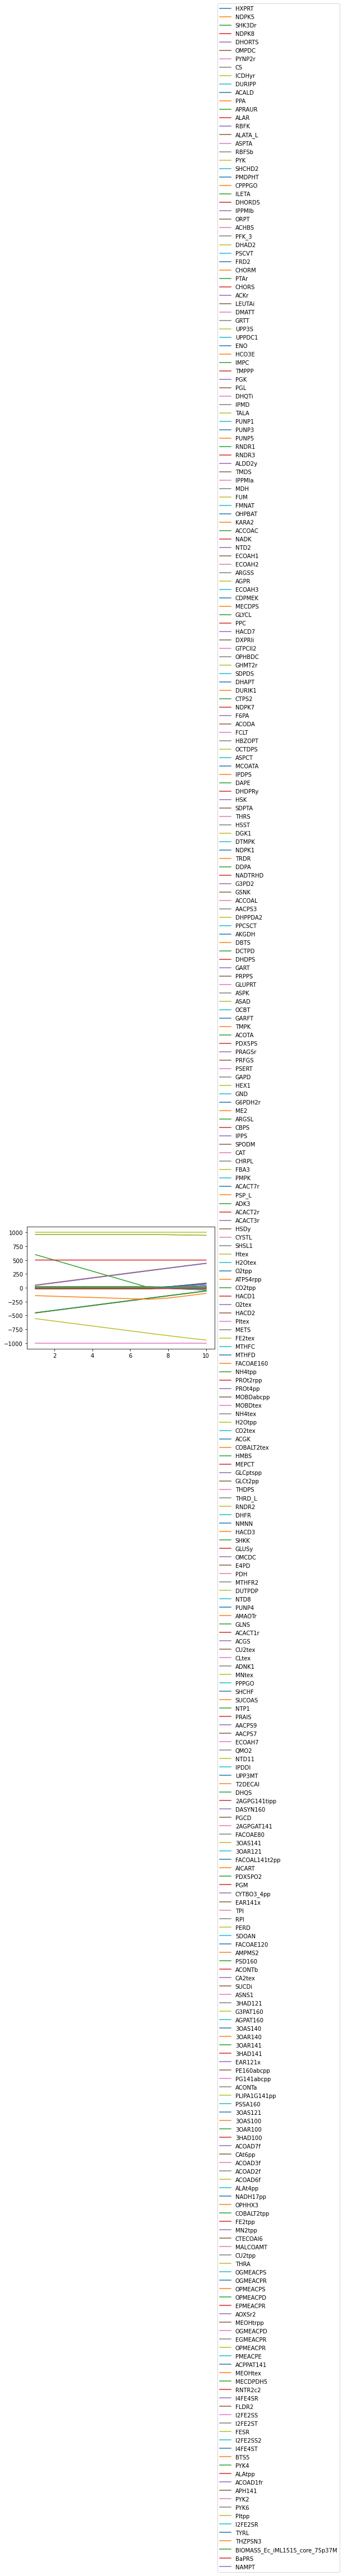

In [26]:
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [27]:
# Table with ordered negative flux reactions
df = df.sort_values([10], ascending = True)
df[:25]

,1,2,3,4,5,6,7,8,9,10
PItex,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
Htex,-557.511894,-601.637178,-645.762463,-689.887747,-734.013032,-778.138317,-822.263601,-864.441074,-904.967539,-945.391078
ATPS4rpp,-142.030607,-153.061928,-164.093249,-175.124570,-186.155891,-197.187212,-208.218533,-186.289699,-144.535061,-101.293821
PRPPS,-455.250218,-411.124933,-366.999649,-322.874364,-278.749079,-234.623795,-190.498510,-146.464452,-102.505996,-58.552312
ADK3,-451.757341,-407.632056,-363.506772,-319.381487,-275.256203,-231.130918,-187.005634,-144.466796,-101.137007,-57.829968
NDPK1,-450.663511,-406.538227,-362.412942,-318.287658,-274.162373,-230.037088,-185.911804,-143.532161,-100.496503,-57.503566
CO2tpp,-3.188689,-3.188689,-3.188689,-3.188689,-3.188689,-3.188689,-3.188689,-11.456939,-26.733536,-42.447041
CO2tex,-3.188689,-3.188689,-3.188689,-3.188689,-3.188689,-3.188689,-3.188689,-11.456939,-26.733536,-42.447041
PGK,-16.135868,-16.135868,-16.135868,-16.135868,-16.135868,-16.135868,-16.135868,-14.954687,-17.629198,-18.972010
PGM,-15.198485,-15.198485,-15.198485,-15.198485,-15.198485,-15.198485,-15.198485,-12.986516,-16.236465,-18.237138


In [30]:
# Table with ordered positive flux reactions
df = df.sort_values([10], ascending = False)
df[:25]

,1,2,3,4,5,6,7,8,9,10
PItpp,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
H2Otex,961.603136,961.603136,961.603136,961.603136,961.603136,961.603136,961.603136,958.459042,952.649945,946.674709
H2Otpp,961.218148,961.218148,961.218148,961.218148,961.218148,961.218148,961.218148,958.459042,952.649945,946.674709
BaPRS,500.667782,500.667782,500.667782,500.667782,500.667782,500.667782,500.667782,500.570594,500.391027,500.206324
PPA,50.126185,94.251470,138.376754,182.502039,226.627323,270.752608,314.877892,357.142604,399.965912,442.740790
NAMPT,44.128439,88.253723,132.379008,176.504292,220.629577,264.754861,308.880146,353.005430,397.130715,441.256000
NMNN,44.125285,88.250569,132.375854,176.501138,220.626423,264.751707,308.876992,353.002735,397.128868,441.255025
SUCDi,0.457873,0.457873,0.457873,0.457873,0.457873,0.457873,0.457873,17.856682,50.001385,83.065423
CYTBO3_4pp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.852064,49.998220,83.063753
FRD2,0.458009,0.458009,0.458009,0.458009,0.458009,0.458009,0.458009,17.856007,42.664091,69.523908


In [28]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/cameo/flux_analysis/analysis.py:816: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/shengbaowang/opt/anaconda3/lib/python3.9/site-packages/ca

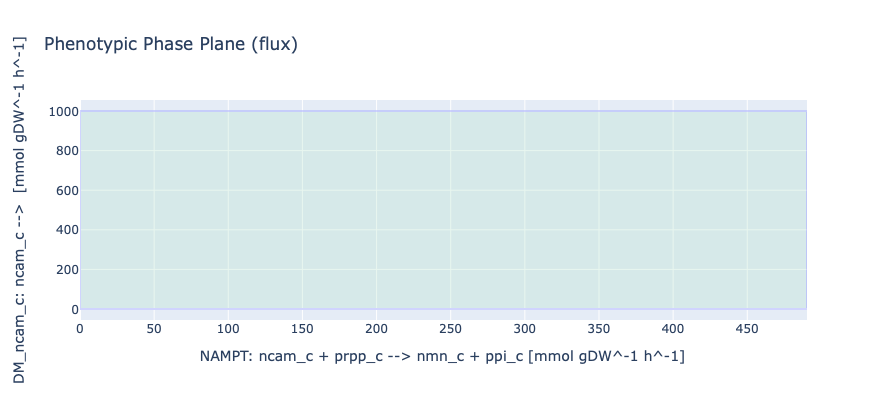

In [34]:
production_envelope = phenotypic_phase_plane(nam_model,
                                             variables=[nam_model.reactions.NAMPT],
                                             objective=nam_model.metabolites.ncam_c)
production_envelope.plot(plotter, height=400)